In [13]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
import scipy.io as io

In [14]:
from PIL import Image
import zipfile
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from IPython import display

In [ ]:
def load(image_file):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_jpeg(image)

    w = tf.shape(image)[1]

    w = w // 2
    real_image = image[:, :w, :]
    input_image = image[:, w:, :]

    input_image = tf.cast(input_image, tf.float32)
    real_image = tf.cast(real_image, tf.float32)

    return input_image, real_image

In [ ]:
img = io.loadmat(directory_name + "/" + filename)
        array_of_img.append(img)

In [ ]:
import cv2
import scipy.io as scio
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

dataFile = r'/folder／reggae.00041.mat' # 单个的mat文件
data = scio.loadmat(dataFile)
print(type(data))
# print (data['data']) 
# 由于导入的mat文件是structure类型的，所以需要取出需要的数据矩阵
a=data['data']
# 取出需要的数据矩阵

# 数据矩阵转图片的函数
def MatrixToImage(data):
    data = data*255
    new_im = Image.fromarray(data.astype(np.uint8))
    return new_im

new_im = MatrixToImage(a)
plt.imshow(a, cmap=plt.cm.gray, interpolation='nearest')
new_im.show()
new_im.save('reggae.00041.bmp') # 保存图片

In [ ]:
def load (input_image_file,real_image_file):
    
    
    real_image=tf.io.real_file(real_image_file)
    real_image=tf.image.decode_jpeg(real_image)
    
    input_image=tf.cast(input_image,tf.float32)
    real_image=tf.cast(real_image,tf.float32)
    
    return input_image,real_image

In [46]:
a=io.loadmat('./label2/coast_arnat59.mat')


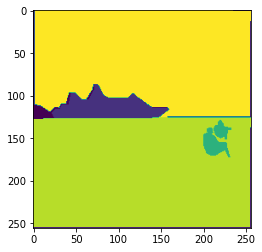

In [49]:
plt.imshow(a['S'])

In [50]:
b=np.array([a['S'] for i in range(3)]).transpose(1,2,0)

In [52]:
c=tf.convert_to_tensor(b)

In [53]:
c

<tf.Tensor: shape=(256, 256, 3), dtype=uint16, numpy=
array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [28, 28, 28],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [28, 28, 28],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [28, 28, 28],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       ...,

       [[25, 25, 25],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [ 0,  0,  0]],

       [[25, 25, 25],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint16)>

In [3]:
def residual_block(filters,size):
    initializer=tf.random_normal_initializer(0,0.02)
    block=tf.keras.Sequential()
    block.add(tf.keras.layers.ZeroPadding2D(1))
    block.add(tf.keras.layers.Conv2D(filters,size,strides=1,padding='valid',kernel_initializer=initializer,use_bias=False))
    block.add(tf.keras.layers.BatchNormalization())
    block.add(tf.keras.layers.ReLU())
    block.add(tf.keras.layers.ZeroPadding2D(1))
    block.add(tf.keras.layers.Conv2D(filters,size,strides=1,padding='valid',kernel_initializer=initializer,use_bias=False))
    block.add(tf.keras.layers.BatchNormalization())
    
    return block

In [4]:
def down_sample(filters,size):
    initializer=tf.random_normal_initializer(0,0.02)
    block=tf.keras.Sequential()
    block.add(tf.keras.layers.Conv2D(filters,size,strides=2,padding='same',kernel_initializer=initializer,use_bias=False))
    block.add(tf.keras.layers.BatchNormalization())
    block.add(tf.keras.layers.ReLU())
    return block

In [5]:
def up_sample(filters,size):
    initializer=tf.random_normal_initializer(0,0.02)
    block=tf.keras.Sequential()
    block.add(tf.keras.layers.Conv2DTranspose(filters,size,strides=2,padding='same',kernel_initializer=initializer,use_bias=False))
    block.add(tf.keras.layers.BatchNormalization())
    block.add(tf.keras.layers.ReLU())
    
    return block

In [77]:
def Generator():
    initializer=tf.random_normal_initializer(0,0.02)
    inputs=tf.keras.layers.Input(shape=[512,512,3])#标签
    
    
    
    #outputs_mean=encoder(x3,inputs)
    
    #local
    x2=inputs
    x2=tf.keras.layers.ZeroPadding2D(3)(x2)
    x2=tf.keras.layers.Conv2D(64,7,strides=1,padding='valid',kernel_initializer=initializer,use_bias=False)(x2)
    x2=tf.keras.layers.BatchNormalization()(x2)
    x2=tf.keras.layers.ReLU()(x2)
    
    x2=tf.keras.layers.Conv2D(64,3,strides=2,padding='same',kernel_initializer=initializer,use_bias=False)(x2)
    x2=tf.keras.layers.BatchNormalization()(x2)
    x2=tf.keras.layers.ReLU()(x2)#(256,256,64)
    
    
    residual_blocks=[
        residual_block(512,3),
        residual_block(512,3),
        residual_block(512,3),
        residual_block(512,3),
        residual_block(512,3),
        residual_block(512,3),
        residual_block(512,3),
        residual_block(512,3),
        residual_block(512,3)
    ]
    residual_blocks2=[
        residual_block(256,3),
        residual_block(256,3),
        residual_block(256,3),
        residual_block(256,3),
        residual_block(256,3),
        residual_block(256,3),
        residual_block(256,3),
        residual_block(256,3),
        residual_block(256,3)
    ]
    #global
    x1=tf.image.resize(inputs,(256,256))
    x1=tf.keras.layers.ZeroPadding2D(3)(x1)
    x1=tf.keras.layers.Conv2D(64,7,strides=1,padding='valid',kernel_initializer=initializer,use_bias=False)(x1)
    x1=tf.keras.layers.BatchNormalization()(x1)
    x1=tf.keras.layers.ReLU()(x1)
    
    #下采样 此时输入为（256，256，64）
    x1=tf.keras.layers.Conv2D(128,3,strides=2,padding='same',kernel_initializer=initializer,use_bias=False)(x1)#(128,128,128)
    x1=tf.keras.layers.BatchNormalization()(x1)
    x1=tf.keras.layers.ReLU()(x1)
    x1=tf.keras.layers.Conv2D(256,3,strides=2,padding='same',kernel_initializer=initializer,use_bias=False)(x1)#(64,64,256)
    x1=tf.keras.layers.BatchNormalization()(x1)
    x1=tf.keras.layers.ReLU()(x1)
    x1=tf.keras.layers.Conv2D(512,3,strides=2,padding='same',kernel_initializer=initializer,use_bias=False)(x1)#(32,32,512)
    x1=tf.keras.layers.BatchNormalization()(x1)
    x1=tf.keras.layers.ReLU()(x1)
    
    #残差
    for block in residual_blocks:
        x11=block(x1)
        x1=tf.add(x1,x11)
    #上采样此时（32，32，512）
    x1=tf.keras.layers.Conv2DTranspose(256,3,strides=2,padding='same',kernel_initializer=initializer,use_bias=False)(x1)#(64,64,256)
    x1=tf.keras.layers.BatchNormalization()(x1)
    x1=tf.keras.layers.ReLU()(x1)
    x1=tf.keras.layers.Conv2DTranspose(128,3,strides=2,padding='same',kernel_initializer=initializer,use_bias=False)(x1)#(128,128,128)
    x1=tf.keras.layers.BatchNormalization()(x1)
    x1=tf.keras.layers.ReLU()(x1)
    x1=tf.keras.layers.Conv2DTranspose(64,3,strides=2,padding='same',kernel_initializer=initializer,use_bias=False)(x1)#(256,256,64)
    x1=tf.keras.layers.BatchNormalization()(x1)
    x1=tf.keras.layers.ReLU()(x1)
    x12=x1
    
    x1=tf.keras.layers.Conv2D(3,7,strides=1,padding='same',kernel_initializer=initializer,use_bias=False,activation='tanh')(x1)
    
    x2=tf.add(x12,x2)#(256,256,64)
    
    x2=tf.keras.layers.Conv2D(128,3,strides=1,padding='same',kernel_initializer=initializer,use_bias=False)(x2)
    x2=tf.keras.layers.BatchNormalization()(x2)
    x2=tf.keras.layers.ReLU()(x2)
    x2=tf.keras.layers.Conv2D(256,3,strides=1,padding='same',kernel_initializer=initializer,use_bias=False)(x2)
    x2=tf.keras.layers.BatchNormalization()(x2)
    x2=tf.keras.layers.ReLU()(x2)
    
    for block in residual_blocks2:
        x22=block(x2)
        x2=tf.add(x2,x22)
    #(256,256,256)
    x2=tf.keras.layers.Conv2D(128,3,strides=1,padding='same',kernel_initializer=initializer,use_bias=False)(x2)
    x2=tf.keras.layers.BatchNormalization()(x2)
    x2=tf.keras.layers.ReLU()(x2)#(256,256,128)
    x2=tf.keras.layers.Conv2D(64,3,strides=1,padding='same',kernel_initializer=initializer,use_bias=False)(x2)
    x2=tf.keras.layers.BatchNormalization()(x2)
    x2=tf.keras.layers.ReLU()(x2)#(256,256,64)
    x2=tf.keras.layers.Conv2DTranspose(64,3,strides=2,padding='same',kernel_initializer=initializer,use_bias=False)(x2)
    x2=tf.keras.layers.BatchNormalization()(x2)
    x2=tf.keras.layers.ReLU()(x2)#(512,512,64)
    
    x2=tf.keras.layers.Conv2D(3,7,strides=1,padding='same',kernel_initializer=initializer,use_bias=False,activation='tanh')(x2)
    
    
    return tf.keras.Model(inputs=inputs,outputs=x2)

In [78]:
Generator().summary()

Model: "functional_38"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_37 (InputLayer)           [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
tf_op_layer_ResizeBilinear_1 (T [(None, 256, 256, 3) 0           input_37[0][0]                   
__________________________________________________________________________________________________
zero_padding2d_83 (ZeroPadding2 (None, 262, 262, 3)  0           tf_op_layer_ResizeBilinear_1[0][0
__________________________________________________________________________________________________
conv2d_146 (Conv2D)             (None, 256, 256, 64) 9408        zero_padding2d_83[0][0]          
______________________________________________________________________________________

In [9]:
def down_sam(filters,size,strides=2):
    initializer=tf.random_normal_initializer(0,0.02)
    block=tf.keras.Sequential()
    
    block.add(tf.keras.layers.Conv2D(filters,size,strides=strides,padding='same',kernel_initializer=initializer,use_bias=False))
    block.add(tf.keras.layers.BatchNormalization())
    block.add(tf.keras.layers.LeakyReLU())
    
    return block

In [10]:
def S_Discriminator():
    initializer=tf.random_normal_initializer(0,0.02)
    inputs=tf.keras.layers.Input(shape=[256,256,3])
    
    x=inputs
    downs=[
        down_sam(128,4),
        down_sam(256,4),
        down_sam(512,4,strides=1)
    ]
    
    x=tf.keras.layers.Conv2D(64,4,strides=2,padding='same',kernel_initializer=initializer,use_bias=False)(x)
    x=tf.keras.layers.LeakyReLU()(x)#(256,256,64)
    
    for down in downs:
        x=down(x)
    #(32,32,512)
    x=tf.keras.layers.Conv2D(64,4,strides=1,padding='same',kernel_initializer=initializer,use_bias=False)(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.LeakyReLU()(x)
    
    x=tf.keras.layers.Conv2D(1,4,strides=1,padding='same',kernel_initializer=initializer,use_bias=False)(x)
    
    return tf.keras.Model(inputs=inputs,outputs=x)

In [14]:
def L_Discriminator():
    initializer=tf.random_normal_initializer(0,0.02)
    inputs=tf.keras.layers.Input(shape=[512,512,3])
    
    x=inputs
    downs=[
        down_sam(128,4),
        down_sam(256,4),
        down_sam(512,4)
    ]
    
    x=tf.keras.layers.Conv2D(64,4,strides=2,padding='same',kernel_initializer=initializer,use_bias=False)(x)
    x=tf.keras.layers.LeakyReLU()(x)#(256,256,64)
    
    for down in downs:
        x=down(x)
    #(32,32,512)
    x=tf.keras.layers.Conv2D(64,4,strides=1,padding='same',kernel_initializer=initializer,use_bias=False)(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.LeakyReLU()(x)
    
    x=tf.keras.layers.Conv2D(1,4,strides=1,padding='same',kernel_initializer=initializer,use_bias=False)(x)
    
    return tf.keras.Model(inputs=inputs,outputs=x)

In [18]:
def MultiscaleDiscriminator():
    inputs=tf.keras.layers.Input([512,512,3])
    x=inputs
    
    x1=tf.keras.layers.AveragePooling2D(3,strides=2,padding='same')(x)
    
    output1=L_Discriminator()(x)
    output2=S_Discriminator()(x1)
    
    return tf.keras.Model(inputs=inputs,outputs=[output1,output2])#大，小

In [47]:
def vgg19():
    inputs=tf.keras.layers.Input([512,512,3])
    x=inputs
    model=tf.keras.applications.VGG19(input_shape=(512,512,3),weights='imagenet',include_top=False)
    slice1=tf.keras.Sequential()
    slice2=tf.keras.Sequential()
    slice3=tf.keras.Sequential()
    slice4=tf.keras.Sequential()
    slice5=tf.keras.Sequential()
    
    for i in range(4):
        slice1.add(model.layers[i])
    for i in range(4,7):
        slice2.add(model.layers[i])
    for i in range(7,12):
        slice3.add(model.layers[i])
    for i in range(12,17):
        slice4.add(model.layers[i])
    for i in range(17,22):
        slice5.add(model.layers[i])
    
    x1=slice1(x)
    x2=slice2(x1)
    x3=slice3(x2)
    x4=slice4(x3)
    x5=slice5(x4)
    
    return tf.keras.Model(inputs=inputs,outputs=[x1,x2,x3,x4,x5])
    

In [50]:
LAMBDA = 100
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [51]:
def Generator_loss(target,gen_dis_image_L,gen_dis_image_S,gen_image):#gen_image:(512,512,3) 
    gan_loss=loss_object(tf.ones_like(gen_dis_image_L),gen_dis_image_L)+loss_object(tf.ones_like(gen_dis_image_S),gen_dis_image_S)
    
    weight=[1/32,1/16,1/8,1/4,1]
    x1,x2,x3,x4,x5=vgg19(gen_image)
    x_1=[x1,x2,x3,x4,x5]
    x11,x22,x33,x44,x55=vgg19(target)
    x_11=[x11,x22,x33,x44,x55]
    l1_loss=0
    for i in range(5):
        l1_loss+=weight[i]*tf.reduce_mean(tf.abs(x1[i]-x_11[i]))
    total_gen_loss=gan_loss+LAMBDA*l1_loss
    
    return total_gen_loss,gan_loss,l1_loss

In [52]:
def MultiscaleDiscriminator_loss(L_target,S_target,L_gen_image,S_gen_image):
    real_loss=loss_object(tf.ones_like(L_target),L_target)+loss_object(tf.ones_like(S_target),S_target)
    
    generated_loss=loss_object(tf.zeros_like(L_gen_image),L_gen_image)+loss_object(tf.zeros_like(S_gen_image),S_gen_image)
    
    total_Dis_loss=real_loss+generated_loss
    return total_Dis_loss

In [53]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [79]:
def train_step(input_image,target,epoch):
    with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
        gen_image=Generator(input_image,training=True)
        
        gen_dis_image_L,gen_dis_image_S=MultiscaleDiscriminator(input_image,training=True)
        L_target,S_target=MultiscaleDiscriminator(target,training=True)
        
        total_gen_loss,gan_loss,l1_loss=Generator_loss(target,gen_dis_image_L,gen_dis_image_S,gen_image)
        
        total_Dis_loss=MultiscaleDiscriminator_loss(L_target,S_target,gen_dis_image_L,gen_dis_image_S)
    generator_gradient=gen_tape.gradient(total_gen_loss,Generator.trainable_variables)
    
    discriminator_gradient=disc_tape.gradient(total_Dis_loss,MultiscaleDiscriminator.trainable_variables)
    
    generator_optimizer.apply_gradients(zip(generator_gradient,Generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(generator_gradient,MultiscaleDiscriminator.trainable_variables))
        

In [80]:
def fit(train_ds, epochs, test_ds):
    for epoch in range(epochs):
        display.clear_output(wait=True)

        for example_input, example_target in test_ds.take(1):
            generate_images(generator, example_input, example_target)
        print("Epoch: ", epoch)

        # Train
        for n, (input_image, target) in train_ds.enumerate():
            print('.', end='')
            if (n+1) % 100 == 0:
                print()
            train_step(input_image, target, epoch)
        print()


In [33]:
tf.shape(y)

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([6])>

In [35]:
a=tf.reshape(y,(2,3))

In [39]:
tf.shape(a)[1].numpy()

3

In [60]:
y=tf.constant([1,0,3,4,5,6])

In [74]:
y+1

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([2, 1, 4, 5, 6, 7])>

In [61]:
tf.math.reduce_mean(y)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [25]:
np.unique(y.numpy().astype(int))

array([0, 1, 3, 4, 5, 6])

In [29]:
im=tf.io.read_file('C://Users//zhou/Desktop/aachen_000000_000019_gtFine_color.png')

TypeError: Image data of dtype object cannot be converted to float

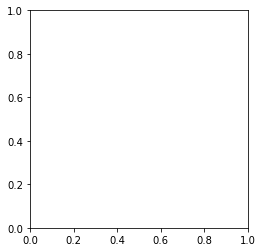

In [16]:
plt.imshow(im)

In [30]:
im=tf.image.decode_png(im)

In [9]:
a=im[:,:,0:3]

In [12]:
np.unique(a)

array([  0,  11,  20,  32,  35,  60,  64,  70, 107, 119, 128, 130, 142,
       152, 153, 180, 220, 232, 244, 251, 255], dtype=uint8)

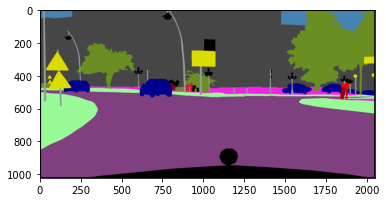

In [10]:
plt.imshow(a)

In [32]:
sum(sum(a.numpy()))

2097152

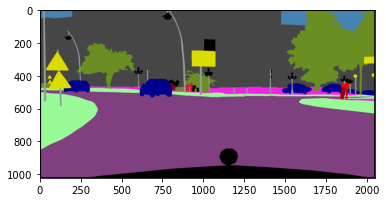

In [18]:
plt.imshow(im[:,:,0:3])

In [119]:
im=tf.image.resize(im,(1024,2048))

In [120]:
im=im/255

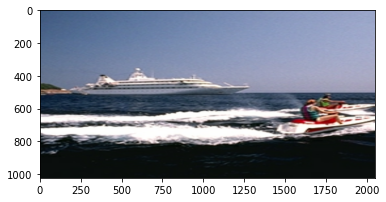

In [121]:
plt.imshow(im)

In [22]:
a = np.array([[1,0,3],[0,0,0],[0,0,9]])
b = np.nonzero(a)
b


(array([0, 0, 2], dtype=int64), array([0, 2, 2], dtype=int64))

In [50]:
a=np.array([1,2,3,4,6,23,2,3,21,1,4,6,3,2,1]).reshape(3,5)

In [53]:
a

array([[ 1,  2,  3,  4,  6],
       [23,  2,  3, 21,  1],
       [ 4,  6,  3,  2,  1]])

In [59]:
(a==2).nonzero()[1]

array([1, 1, 3], dtype=int64)

In [52]:
np.nonzero(a==2)

(array([0, 1, 2], dtype=int64), array([1, 1, 3], dtype=int64))